In [52]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [2]:
os.listdir()

['cancer.ipynb', 'test', 'train']

import cv2
import os
import matplotlib.pyplot as plt

# Define the paths to the image folders
folder_0 = 'F:\\Chess\\cancer\\train\\0'
folder_1 = 'F:\\Chess\\cancer\\train\\1'

# Function to load and display images from a folder
def display_images_from_folder(folder_path):
    image_files = os.listdir(folder_path)
    
    for image_file in image_files:
        if image_file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check if it's an image file
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            
            if image is not None:
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(image_file)
                plt.axis()
                plt.show()

# Display images from folder_0
display_images_from_folder(folder_0)

# Display images from folder_1
display_images_from_folder(folder_1)


In [3]:
base_dir = 'F:\Chess\cancer'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['cancer.ipynb', 'test', 'train']

Contents of train directory:
['0', '1']

Contents of validation directory:
['0', '1']


In [4]:

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with training 0/1 pictures
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

# Directory with validation 0/1 pictures
validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')


In [5]:
#file names
train_0_fnames = os.listdir( train_0_dir )
train_1_fnames = os.listdir( train_1_dir )

print(train_0_fnames[:10])
print(train_1_fnames[:10])

['10851_504613176_57b02300e00d4542aec32501bb4086cf.png', '10960_1019978559_5a4d2ff7298341dea61b980edcfbba32.png', '10960_143347175_3ad730ef301942acb38e38eb99c01077.png', '10960_1731017221_dde3dc84b176471eb93c710336e9bad8.png', '10960_1982284680_440153a8924b4cdc9e4fd50c801ab846.png', '10960_2116616347_6468e3a2023a488fadff8c3468c314c5.png', '10960_372686829_2dc2962b2fa84d47b064c2386cf6c534.png', '10960_441379575_5cce12a432be459786fb208c9592f07c.png', '10960_746867174_bf01377ad5b542e38500314ccd25b438.png', '11158_1375700402_ea953a0631f8445586f5fcc646cac409.png']
['12725_1435663649_0505a3b39c4c426ca8fa06c9d893806a.png', '12725_1435663649_0a04f820d3fb47e6a68db231d7a35062.png', '12725_1435663649_0d1c1b01a24d46bcbb7dfca40677192c.png', '12725_1435663649_0eb4d716a4834abb8b8a57fbea52096f.png', '12725_1435663649_13bc2df1e7aa49a2b2043504993a0463.png', '12725_1435663649_21279dcf6ed147e38830f7c45f296aa1.png', '12725_1435663649_23b71e995dea476791cd86c6f950799b.png', '12725_1435663649_2485264440d84554

In [6]:
#total number of images
print("total number of images in train's zero folder",len(os.listdir(train_0_dir)))
print("total number of images in train's one folder",len(os.listdir(train_1_dir)))

#validation 
print("total number of images in test's zero folder", len(os.listdir(validation_0_dir)))
print("total number of images in test's one folder", len(os.listdir(validation_1_dir)))

total number of images in train's zero folder 951
total number of images in train's one folder 953
total number of images in test's zero folder 238
total number of images in test's one folder 3


Sample 0 image:


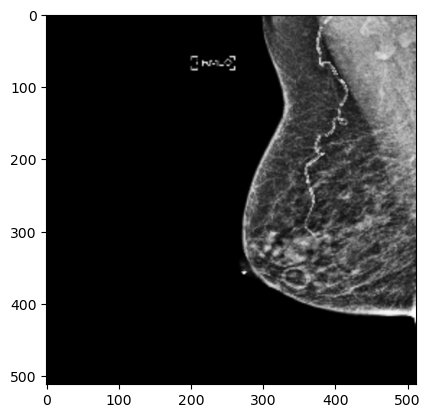


Sample 1 image:


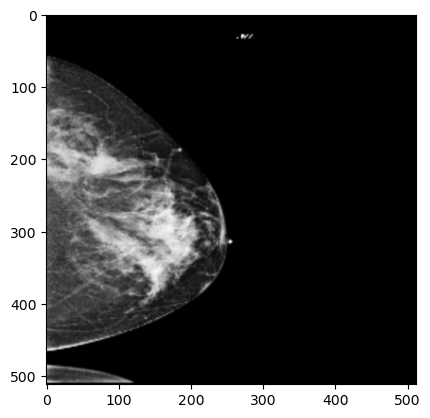

In [7]:
print("Sample 0 image:")
plt.imshow(load_img(f"{os.path.join(train_0_dir, os.listdir(train_0_dir)[0])}"))
plt.show()

print("\nSample 1 image:")
plt.imshow(load_img(f"{os.path.join(train_1_dir, os.listdir(train_1_dir)[0])}"))
plt.show()

In [8]:
#data argumentation on train data and rescale the test data
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR=train_dir, VALIDATION_DIR=validation_dir)

Found 1904 images belonging to 2 classes.
Found 241 images belonging to 2 classes.


In [17]:

def create_model():
  model = tf.keras.models.Sequential([ 
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0008),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy']) 

  return model

In [18]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.989):
      print("\nReached 98.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [19]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 25,
                    verbose = 1, callbacks=[callbacks])

Epoch 1/25
119/119 [==============================] - 30s 241ms/step - loss: 0.6819 - accuracy: 0.5578 - val_loss: 0.9165 - val_accuracy: 0.0622
Epoch 2/25
119/119 [==============================] - 28s 238ms/step - loss: 0.6379 - accuracy: 0.6239 - val_loss: 0.9865 - val_accuracy: 0.1701
Epoch 3/25
119/119 [==============================] - 28s 235ms/step - loss: 0.5676 - accuracy: 0.6917 - val_loss: 0.5786 - val_accuracy: 0.5394
Epoch 4/25
119/119 [==============================] - 28s 232ms/step - loss: 0.5076 - accuracy: 0.7384 - val_loss: 0.7112 - val_accuracy: 0.4481
Epoch 5/25
119/119 [==============================] - 28s 231ms/step - loss: 0.4626 - accuracy: 0.7736 - val_loss: 0.3130 - val_accuracy: 0.8174
Epoch 6/25
119/119 [==============================] - 27s 229ms/step - loss: 0.3800 - accuracy: 0.8298 - val_loss: 0.7781 - val_accuracy: 0.6183
Epoch 7/25
119/119 [==============================] - 28s 232ms/step - loss: 0.3516 - accuracy: 0.8524 - val_loss: 0.6683 - val_ac

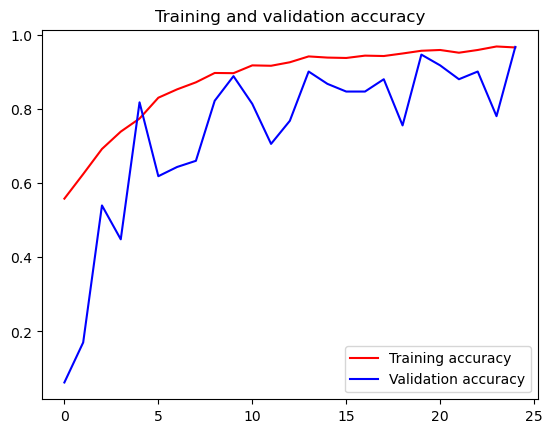

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [24]:
model.save("cancer.h5")

c:\Users\w10\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Transfer learning

In [28]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Create an instance of the inception model from the local pre-trained weights
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [29]:

def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False


  return pre_trained_model

In [30]:
pre_trained_model = create_pre_trained_model(local_weights_file)

In [31]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


To check that all the layers in the model were set to be non-trainable, you can also run the cell below:

In [32]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [39]:

# Load the InceptionV3 model (or replace with your own model)
model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

# Get the names of the layers
layer_names = [layer.name for layer in model.layers]

# Print the layer names
for name in layer_names:
    print(name)


96112376/96112376 [==============================] - 144s 1us/step
input_2
conv2d_114
batch_normalization_94
activation_94
conv2d_115
batch_normalization_95
activation_95
conv2d_116
batch_normalization_96
activation_96
max_pooling2d_24
conv2d_117
batch_normalization_97
activation_97
conv2d_118
batch_normalization_98
activation_98
max_pooling2d_25
conv2d_122
batch_normalization_102
activation_102
conv2d_120
conv2d_123
batch_normalization_100
batch_normalization_103
activation_100
activation_103
average_pooling2d_9
conv2d_119
conv2d_121
conv2d_124
conv2d_125
batch_normalization_99
batch_normalization_101
batch_normalization_104
batch_normalization_105
activation_99
activation_101
activation_104
activation_105
mixed0
conv2d_129
batch_normalization_109
activation_109
conv2d_127
conv2d_130
batch_normalization_107
batch_normalization_110
activation_107
activation_110
average_pooling2d_10
conv2d_126
conv2d_128
conv2d_131
conv2d_132
batch_normalization_106
batch_normalization_108
batch_normali

In [40]:
# grader-required-cell

# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed9')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
 

  return last_output

In [41]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 3, 3, 2048)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 3, 3, 2048), dtype=tf.float32, name=None), name='mixed9/concat:0', description="created by layer 'mixed9'")


In [55]:
from tensorflow.keras.models import Model

In [58]:
# grader-required-cell

# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):

  # Flatten the output layer to 1 dimension
  x = keras.layers.Flatten()(last_output)


  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.15
  x = keras.layers.Dropout(0.15)(x) 
  x = Dense(512, activation = "relu")(x)
  x = keras.layers.Dropout(0.15)(x)
  # Add a final sigmoid layer for classification
  x = Dense(1, activation='sigmoid')(x)        

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), 
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [59]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 35,123,425 total parameters in this model.
There are 19,400,705 trainable parameters in this model.


In [61]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/100
119/119 [==============================] - 52s 435ms/step - loss: 0.2022 - accuracy: 0.9133 - val_loss: 0.1188 - val_accuracy: 0.9461
Epoch 2/100
119/119 [==============================] - 51s 430ms/step - loss: 0.1490 - accuracy: 0.9312 - val_loss: 0.0594 - val_accuracy: 0.9710
Epoch 3/100
119/119 [==============================] - 48s 399ms/step - loss: 0.1289 - accuracy: 0.9475 - val_loss: 0.1884 - val_accuracy: 0.9212
Epoch 4/100
119/119 [==============================] - 48s 404ms/step - loss: 0.1237 - accuracy: 0.9443 - val_loss: 0.1365 - val_accuracy: 0.9378
Epoch 5/100
119/119 [==============================] - 47s 398ms/step - loss: 0.1171 - accuracy: 0.9501 - val_loss: 0.3706 - val_accuracy: 0.8548
Epoch 6/100
119/119 [==============================] - 48s 405ms/step - loss: 0.0872 - accuracy: 0.9611 - val_loss: 0.3038 - val_accuracy: 0.9004
Epoch 7/100
119/119 [==============================] - 48s 404ms/step - loss: 0.0891 - accuracy: 0.9680 - val_loss: 0.1476 -